In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from multinomial_kernel import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [20]:
raw_train_data = "../../data/train.csv"
raw_test_data = "../../data/test.csv"

In [21]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df = raw_data[raw_data['time'] < 20090101]
valid_df = raw_data[raw_data['time'] >= 20090101]

cols = ['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT', 'T500',
        "Label"]

train_df, train_data = preproc.preprocess_data(train_df, drop_cols=["SNo", "time"])
train_df = train_df[cols]

valid_df, valid_data = preproc.preprocess_data(valid_df, drop_cols=["SNo", "time"])
valid_df = valid_df[cols]

# np.random.shuffle(train_df)
X_train = train_df.drop("Label", axis=1).to_numpy()
y_train = train_df["Label"]#.to_numpy()

# np.random.shuffle(valid_df)
X_valid = valid_df.drop("Label", axis=1).to_numpy()
y_valid = valid_df["Label"]#.to_numpy()

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

Index(['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT',
       'T500', 'Label'],
      dtype='object')


In [24]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

/Users/rafaelapinter/Library/Mobile Documents/com~apple~CloudDocs/1.UdeM/github-projects/extreme-weather-events-ift6380/notebooks/logistic_regression/multinomial_kernel.py:111: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (probs - (np.arange(self.num_classes) == y[:, None]).astype(int)) / len(y),


Epoch 0, cross entropy loss: 1.0986122886681093
Epoch 100, cross entropy loss: 0.7463807906527501
Epoch 200, cross entropy loss: 0.70272854864697
Epoch 300, cross entropy loss: 0.6881895362567
Epoch 400, cross entropy loss: 0.6804957644399963
Epoch 500, cross entropy loss: 0.6753698184479886
Epoch 600, cross entropy loss: 0.671515163870679
Epoch 700, cross entropy loss: 0.6684132976093302
Epoch 800, cross entropy loss: 0.6658146990071333
Epoch 900, cross entropy loss: 0.6635819421695405
Index(['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT',
       'T500', 'Label'],
      dtype='object')
Confusion Matrix:
[[1710   38   88]
 [ 101   11    0]
 [ 192    0  260]] 

Accuracy:
0.8254 

Precision:
0.6084 

Recall:
0.5349 

F1 Score:
0.5693


# Wrapper method

In [20]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

/Users/rafaelapinter/Library/Mobile Documents/com~apple~CloudDocs/1.UdeM/github-projects/extreme-weather-events-ift6380/notebooks/logistic_regression/multinomial_kernel.py:111: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (probs - (np.arange(self.num_classes) == y[:, None]).astype(int)) / len(y),


Epoch 0, cross entropy loss: 1.0986122886681093
Epoch 100, cross entropy loss: 0.7463807906527501
Epoch 200, cross entropy loss: 0.70272854864697
Epoch 300, cross entropy loss: 0.6881895362567
Epoch 400, cross entropy loss: 0.6804957644399963
Epoch 500, cross entropy loss: 0.6753698184479886
Epoch 600, cross entropy loss: 0.671515163870679
Epoch 700, cross entropy loss: 0.6684132976093302
Epoch 800, cross entropy loss: 0.6658146990071333
Epoch 900, cross entropy loss: 0.6635819421695405
Index(['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT',
       'T500', 'Label'],
      dtype='object')
Confusion Matrix:
[[1710   38   88]
 [ 101   11    0]
 [ 192    0  260]] 

Accuracy:
0.8254 

Precision:
0.6084 

Recall:
0.5349 

F1 Score:
0.5693


In [5]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

/Users/rafaelapinter/Library/Mobile Documents/com~apple~CloudDocs/1.UdeM/github-projects/extreme-weather-events-ift6380/notebooks/logistic_regression/multinomial_kernel.py:111: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (probs - (np.arange(self.num_classes) == y[:, None]).astype(int)) / len(y),


Epoch 0, cross entropy loss: 1.0986122886681093
Epoch 100, cross entropy loss: 0.7463807906527501
Epoch 200, cross entropy loss: 0.70272854864697
Epoch 300, cross entropy loss: 0.6881895362567
Epoch 400, cross entropy loss: 0.6804957644399963
Epoch 500, cross entropy loss: 0.6753698184479886
Epoch 600, cross entropy loss: 0.671515163870679
Epoch 700, cross entropy loss: 0.6684132976093302
Epoch 800, cross entropy loss: 0.6658146990071333
Epoch 900, cross entropy loss: 0.6635819421695405
Index(['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT',
       'T500', 'Label'],
      dtype='object')
Confusion Matrix:
[[1710   38   88]
 [ 101   11    0]
 [ 192    0  260]] 

Accuracy:
0.8254 

Precision:
0.6084 

Recall:
0.5349 

F1 Score:
0.5693


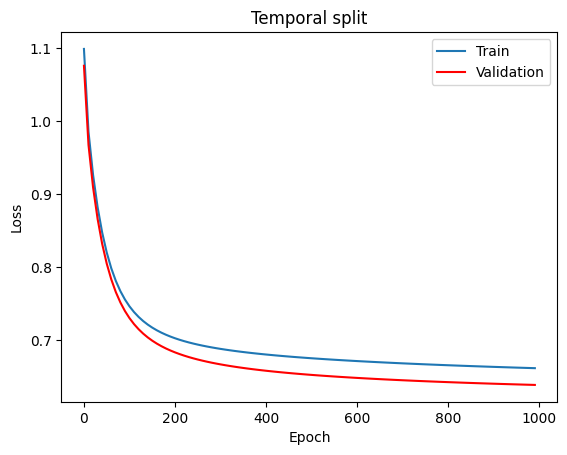

In [13]:
plt.plot(
    model.iters,
    model.train_errors,
    label="Train"
)

plt.plot(
    model.iters,
    model.valid_errors,
    label="Validation",
    color='r'
)

plt.ylabel("Loss")
plt.title("Temporal split")
plt.xlabel("Epoch")
plt.legend()
plt.show()

---

In [23]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT', 'T500',
                     ]].to_numpy()

test_data = preproc.normalize_data(test_data)

In [24]:
test_data.shape

(10320, 11)

In [25]:
y_pred_test = model.predict(X=test_data)

In [26]:
pd.Series(y_pred_test).value_counts(normalize=True)

0    0.822093
2    0.146512
1    0.031395
dtype: float64

In [27]:
y_pred_test

array([2, 2, 2, ..., 1, 1, 1])

In [28]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}_rm_dupls_top_cols_temporal_separation.csv", index=False)

0.738